# 전국 커피숍 매장 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN, NAN, nan

data_coffee = pd.read_csv('../data_visual/data_coffee.csv',encoding='cp949')
print(type(data_coffee))
print(data_coffee.head())

# print(data_coffee.shape())
print(data_coffee.columns)

<class 'pandas.core.frame.DataFrame'>
   number        companyName  \
0       1  #11(Sharp eleven)   
1       2  ( 주)커피빈코리아청주지웰시티점   
2       3           (aA)더블에이   
3       4           (강서)카페치따   
4       5        (로즈버드)명동아바타   

                                              adress  \
0       서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44)    
1  충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 12...   
2                            경상북도 경산시 사동 39번지 108-2호   
3    서울특별시 강서구 등촌동 63-12번지 외 2필지 어위쉬예다인 (지상 1층) 104호   
4                  서울특별시 중구 명동2가 83-5번지 (아바타1층1218)    

                                      adressBystreet  dateOflicensing  \
0  서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))         20080917   
1  충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 1...         20101124   
2                  경상북도 경산시 백자로10길 3-11, 108-2호 (사동)         20130902   
3        서울특별시 강서구 양천로 452, 1층 104호 (등촌동, 3동 어위쉬예다인)         20121108   
4                                                NaN         200209

## 매장의 규모 정보
* sizeOfsite는 매장의 규모를 나타내는 변수다. 
* sizeOfsite 변수에 대한 간단한 정보들을 알아보겠다.

In [2]:
# Column 별 자료형 확인. sizeOfsize은 float64로 확인되었다.
print(type(data_coffee.info()))

# skipna의 인자가 False이면 NaN
print(data_coffee.sizeOfsite.mean(skipna = False))

# 기본 값이 True인 걸 알 수 있다. 하단의 두 값 일치
print("===============매장 규모 평균===============")
print(data_coffee.sizeOfsite.mean(skipna = True))
print(data_coffee.sizeOfsite.mean())

print("===============최대 매장 규모===============")       # 명백한 이상치
print(data_coffee.sizeOfsite.max())
print("===============최소 매장 규모===============")       # 0은 결측값
print(data_coffee.sizeOfsite.min())
print("=============매장 규모 표준 편차=============")
print(data_coffee.sizeOfsite.std())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46832 entries, 0 to 46831
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number                46832 non-null  int64  
 1   companyName           46832 non-null  object 
 2   adress                46600 non-null  object 
 3   adressBystreet        39548 non-null  object 
 4   dateOflicensing       46832 non-null  int64  
 5   stateOfbusiness       46832 non-null  object 
 6   dateOfclosure         13245 non-null  float64
 7   startdateOfcessation  0 non-null      float64
 8   duedateOfcessation    0 non-null      float64
 9   dateOfreOpen          0 non-null      float64
 10  areaOfsite            0 non-null      float64
 11  zip                   0 non-null      float64
 12  waterwork             29610 non-null  object 
 13  numOfmenWorker        5918 non-null   float64
 14  yearOfStart           46813 non-null  float64
 15  multipleUse        

## 히스토그램 그리기

히스토그램을 그리기 앞서서 결측값을 제거해야 한다. 

커피숍 데이터의 경우 결측값이 NaN과 0으로 표시됨에 따라 두 결측값 모두 제거해야 한다.

In [3]:
# 먼저 기존 데이터의 총 개수와 NaN의 개수, 그리고 NaN을 제외한 데이터의 총 개수를 출력한다.

# 전체: 46832개, NaN 제외: 46813개, NaN: 19개

print(data_coffee['sizeOfsite'].shape[0])
print(data_coffee['sizeOfsite'].count())
num_rows = data_coffee.shape[0]
num_missing = num_rows - data_coffee.count()
print(num_missing['sizeOfsite'])

46832
46813
19


In [4]:
# 원본 데이터의 복사본을 만들어 안전하게 NaN이 있는 열을 제외한다
data_coffee_copy = data_coffee.copy()

data_drop = data_coffee_copy.dropna(subset=['sizeOfsite'],axis=0)
print(data_drop['sizeOfsite'].shape[0])
# print(data_drop.head())

46813


In [5]:
# NaN 삭제. axis = 0 인자를 통해 sizeOfsites column 값 NaN인 row를 삭제한다.
data_size = data_coffee['sizeOfsite'].dropna(axis=0)
# Boolean 추출 (value != 0)
data_size = data_size[data_size != 0]

# NaN과 0의 두 결측값을 모두 제거한 최종 개수는 45472개가 나왔다.
print(data_size.shape[0])
print(data_size)

45472
0         20.80
1        212.72
2         20.04
3         64.17
4         11.40
          ...  
46827     30.61
46828     44.21
46829     35.70
46830     46.20
46831    176.49
Name: sizeOfsite, Length: 45472, dtype: float64


(0.0, 10000.0)

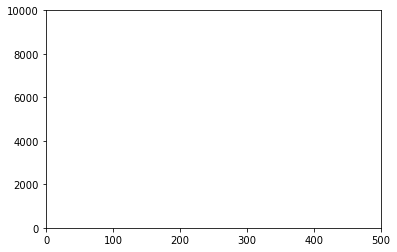

In [6]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
plt.xlim([0, 500])
plt.ylim([0, 10000])

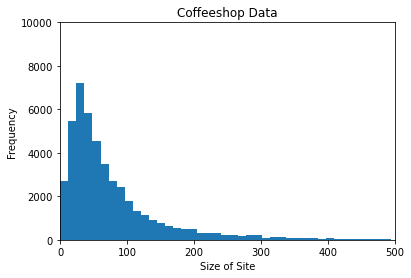

In [7]:
axes1.hist(data_size, bins=2000)
axes1.set_title('Coffeeshop Data')
axes1.set_xlabel('Size of Site')
axes1.set_ylabel('Frequency')

fig

In [8]:
# Boolean 추출을 이용해 점포 사이즈가 500 이상인 outlier를 제거한다.

data_refined = data_size[data_size<500]
outlier = data_size.shape[0] - data_refined.shape[0]

print("===============이상치의 개수===============")
print(outlier)
print("===============전체 매장 수===============")
print(data_refined.shape[0])

===============이상치의 개수===============
112
===============전체 매장 수===============
45360


In [9]:
print("===============매장 규모 평균===============")
print(data_refined.mean())
print("===============최대 매장 규모===============")
print(data_refined.max())
print("===============최소 매장 규모===============")
print(data_refined.min())
print("=============매장 규모 표준 편차=============")
print(data_refined.std())

===============매장 규모 평균===============
75.90031261022935
===============최대 매장 규모===============
499.2
===============최소 매장 규모===============
0.25
=============매장 규모 표준 편차=============
72.00972692847462


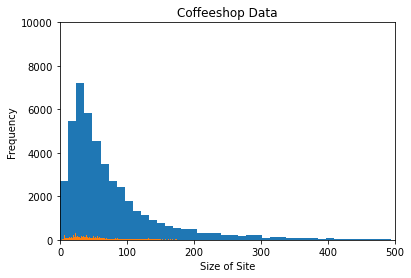

In [10]:
axes1.hist(data_refined, bins=2000)
axes1.set_title('Coffeeshop Data')
axes1.set_xlabel('Size of Site')
axes1.set_ylabel('Frequency')
fig

## 분석 결과

결측치와 이상치를 제외하고 45360개의 데이터를 분석하고 히스토그램을 만들었다.

매장 규모의 평균은 75.9였고 이상치를 제외한 최대 규모는 499.2였으며 최소는 0.25였다.

표준 편차는 72.01이었다.

히스토그램에서 확인했다시피 대부분의 매장의 규모는 100개 이하에 집중되어 있었다.
